In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [108]:
df2 = pd.read_csv('./csv/gp_ts/gp_ts_2.csv')
df2.head()

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.3,0.6,0.05,0.05,0.05,163,1
1,0.3,0.6,0.05,0.05,0.10,182,1
2,0.3,0.6,0.05,0.05,0.15,169,1
3,0.3,0.6,0.05,0.05,0.20,153,1
4,0.3,0.6,0.05,0.05,0.25,180,1


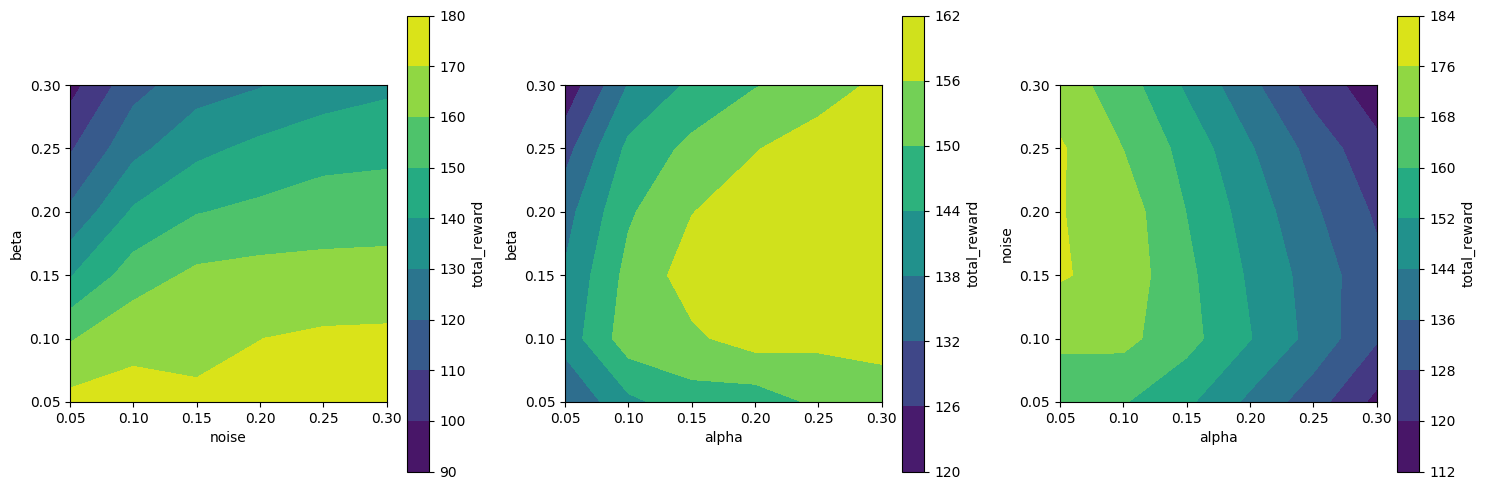

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Noise-Beta Plot
df_subset1 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset1 = df_subset1.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

pivot_table1 = df_subset1.pivot(index='noise', columns='beta', values='total_reward')
pivot_table1 = pivot_table1.fillna(0)

X1 = pivot_table1.columns.values
Y1 = pivot_table1.index.values
Z1 = pivot_table1.values
X1, Y1 = np.meshgrid(X1, Y1)

# Alpha-Beta Plot
df_subset2 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset2 = df_subset2.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()

pivot_table2 = df_subset2.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table2 = pivot_table2.fillna(0)

X2 = pivot_table2.columns.values
Y2 = pivot_table2.index.values
Z2 = pivot_table2.values
X2, Y2 = np.meshgrid(X2, Y2)

# Alpha-Noise Plot
df_subset3 = df2[['noise', 'alpha', 'beta', 'total_reward']]
df_subset3 = df_subset3.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()

pivot_table3 = df_subset3.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table3 = pivot_table3.fillna(0)

X3 = pivot_table3.columns.values
Y3 = pivot_table3.index.values
Z3 = pivot_table3.values
X3, Y3 = np.meshgrid(X3, Y3)

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Noise-Beta
c1 = axs[0].contourf(X1, Y1, Z1)
fig.colorbar(c1, ax=axs[0], label='total_reward')
axs[0].set_xlabel('noise')
axs[0].set_ylabel('beta')
axs[0].set_aspect('equal')

# Plot Alpha-Beta
c2 = axs[1].contourf(X2, Y2, Z2)
fig.colorbar(c2, ax=axs[1], label='total_reward')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('beta')
axs[1].set_aspect('equal')

# Plot Alpha-Noise
c3 = axs[2].contourf(X3, Y3, Z3)
fig.colorbar(c3, ax=axs[2], label='total_reward')
axs[2].set_xlabel('alpha')
axs[2].set_ylabel('noise')
axs[2].set_aspect('equal')

# Show the figure
plt.tight_layout()
plt.show()


In [101]:
df_subset4 = df2
max_reward = df_subset4['total_reward'].max()
max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward]
max_reward_records

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
37,0.3,0.6,0.10,0.05,0.10,192,3
54,0.3,0.6,0.10,0.20,0.05,192,3
91,0.3,0.6,0.15,0.20,0.10,192,3
127,0.3,0.6,0.20,0.20,0.10,192,3
164,0.3,0.6,0.25,0.20,0.15,192,3
173,0.3,0.6,0.25,0.25,0.30,192,3
199,0.3,0.6,0.30,0.20,0.10,192,3


In [102]:
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')
df.head()

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
0,0.3,0.6,0.05,0.05,0.05,1,0,0.968262,0
1,0.3,0.6,0.05,0.05,0.05,1,1,0.233666,0
2,0.3,0.6,0.05,0.05,0.05,1,2,0.754891,0
3,0.3,0.6,0.05,0.05,0.05,1,3,0.505742,0
4,0.3,0.6,0.05,0.05,0.05,1,4,0.328361,0


In [103]:
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.15) &  (df['seed'] == 1)]
r_df = f_df[['play_time', 'select_arm', 'reward']]

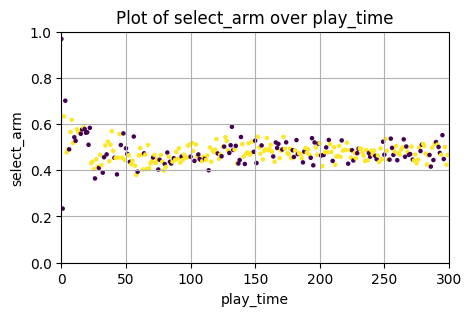

In [104]:
plt.figure(figsize=(5,3))
plt.scatter(r_df['play_time'], r_df['select_arm'], s=5, c=r_df['reward'])
plt.xlabel('play_time')
plt.ylabel('select_arm')
plt.title('Plot of select_arm over play_time')  
plt.xlim(0,len(r_df['play_time']))
plt.ylim(0,1)
plt.grid()
plt.show()

In [98]:
df2 = pd.read_csv('./csv/gp_ucb/gp_ucb_2.csv')
df2.head()

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.3,0.6,0.05,0.05,0.05,174,3
1,0.3,0.6,0.05,0.05,0.10,174,3
2,0.3,0.6,0.05,0.05,0.15,180,3
3,0.3,0.6,0.05,0.05,0.20,175,3
4,0.3,0.6,0.05,0.05,0.25,180,3
